In [435]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import warnings
from dfply import *

warnings.filterwarnings("ignore")
%matplotlib inline

## Load Datasets with Pandas

In [457]:
base_df = pd.read_csv('../data/Assignment 2 - USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv', 
                      header=0, 
                      parse_dates=['Date/Time'])
base_df.head(5)

,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly)
0,01/01 01:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803
1,01/01 02:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084
2,01/01 03:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442
3,01/01 04:00:00,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107
4,01/01 05:00:00,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137


In [458]:
new_df = pd.read_csv('../data/Assignment 2 - new.app4.csv', 
                     header=0, 
                     parse_dates=['time'])
new_df

,Unnamed: 0,time,W_min
0,1,2013-06-07 11:04:00,1142.919571
1,2,2013-06-07 11:05:00,371.239567
2,3,2013-06-07 11:06:00,367.887333
3,4,2013-06-07 11:07:00,702.714100
4,5,2013-06-07 11:08:00,1655.944450
...,...,...,...
10841,10842,2013-09-17 23:06:00,1.316350
10842,10843,2013-09-17 23:07:00,1.309550
10843,10844,2013-09-17 23:08:00,1.296950
10844,10845,2013-09-17 23:09:00,1.303717


## Merge the data of the appliance into hourly

#### Check if there are duplicates in the 'time' column.

In [459]:
new_df.duplicated(subset=['time']).value_counts()

False    10846
dtype: int64

#### Merge the consumption by hour.

In [460]:
new_df_hour = pd.DataFrame(columns=['time', 'W_min_sum'])
pos_minute = 0
pos_hour = 0

while pos_minute < len(new_df):
    temp_sum = 0
    start_time = new_df.time[pos_minute]
    test_time = (start_time.month, start_time.day, start_time.hour)
    
    while (start_time.month, start_time.day, start_time.hour) == test_time:
        temp_sum += new_df.W_min[pos_minute]
        pos_minute += 1
        if pos_minute == len(new_df):
            break
        start_time = new_df.time[pos_minute]
        
    start_time = new_df.time[pos_minute-1]
    new_df_hour.loc[pos_hour] = [datetime(2013, start_time.month, start_time.day, start_time.hour), temp_sum]
    pos_hour += 1

In [461]:
new_df_hour

,time,W_min_sum
0,2013-06-07 11:00:00,57388.943382
1,2013-06-07 12:00:00,27227.961318
2,2013-06-07 13:00:00,111476.298141
3,2013-06-07 14:00:00,109021.960420
4,2013-06-07 15:00:00,5773.963306
...,...,...
240,2013-09-17 19:00:00,81.495167
241,2013-09-17 20:00:00,81.473579
242,2013-09-17 21:00:00,82.654553
243,2013-09-17 22:00:00,81.191117


## Merge two dataset

#### Change the unit to kilowatt.

In [462]:
new_df_hour.W_min_sum = new_df_hour.W_min_sum / 1000

In [463]:
new_df_hour

,time,W_min_sum
0,2013-06-07 11:00:00,57.388943
1,2013-06-07 12:00:00,27.227961
2,2013-06-07 13:00:00,111.476298
3,2013-06-07 14:00:00,109.021960
4,2013-06-07 15:00:00,5.773963
...,...,...
240,2013-09-17 19:00:00,0.081495
241,2013-09-17 20:00:00,0.081474
242,2013-09-17 21:00:00,0.082655
243,2013-09-17 22:00:00,0.081191


### Merge two datasets

#### Convert the 24:00 of one day to 00:00 of the following day.

In [464]:
for i in range(0, len(base_df)-1):
    if base_df['Date/Time'][i][8:10] == '24':
        base_df['Date/Time'][i] = base_df['Date/Time'][i+1][:8] + '00:00:00'
        
base_df['Date/Time'][8759] = ' 01/01  00:00:00'

#### Add the year 2013 to the 'Date/Time' column of the base dataset and convert its type to timestamp.

In [465]:
base_df['Date/Time'] = '2013/' + base_df['Date/Time']

In [466]:
base_df['Date/Time'] = pd.to_datetime(base_df['Date/Time'])

#### Merge two datasets.

In [467]:
df = pd.merge(base_df, 
              new_df_hour, 
              left_on='Date/Time',
              right_on='time', 
              how='outer')     # outer join

In [468]:
df = df.drop('time', axis=1)
df

,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),W_min_sum
0,2013-01-01 01:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,NaN
1,2013-01-01 02:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,NaN
2,2013-01-01 03:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,NaN
3,2013-01-01 04:00:00,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,NaN
4,2013-01-01 05:00:00,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2013-12-31 20:00:00,2.601121,0.044507,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.743542,0.160179,0.349591,0.646167,0.684999,NaN
8756,2013-12-31 21:00:00,2.445630,0.046038,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.677155,0.145877,0.310730,0.668381,0.626843,NaN
8757,2013-12-31 22:00:00,2.206391,0.044963,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.570934,0.122994,0.293949,0.652777,0.549092,NaN
8758,2013-12-31 23:00:00,1.769166,0.295330,0.0,0.256420,0.0,0.006642,0.006642,0.006642,0.424881,0.091531,0.234174,0.564895,0.430399,NaN


## Add a new column to give total hourly consumption of electricity

In [469]:
df['W_min_sum'] = df['W_min_sum'].replace(np.nan, 0)

In [470]:
df['Total Comsumption'] = df.sum(axis=1, numeric_only=True)

In [471]:
df = df.rename({'Date/Time':'Time'}, axis='columns')

In [472]:
df.head(5)

,Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),W_min_sum,Total Comsumption
0,2013-01-01 01:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,0.0,11.035430
1,2013-01-01 02:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,0.0,11.496637
2,2013-01-01 03:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,0.0,11.757447
3,2013-01-01 04:00:00,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,0.0,11.885034
4,2013-01-01 05:00:00,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,0.0,12.323477


In [473]:
filename = '../data/output.csv'
df.to_csv(filename)

## Visualization

#### Add 'Date', 'Hour' and 'Weekday' to indicate the date.

In [475]:
df['Date'] = df.apply(lambda x: str(x.Time)[5:10], axis=1)
df['Hour'] = df.apply(lambda x: str(x.Time)[11:13], axis=1)
df['Weekday'] = df.apply(lambda x: x.Time.weekday(), axis=1)
df.head(5)

,Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),W_min_sum,Total Comsumption,Date,Hour,Weekday
0,2013-01-01 01:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,0.0,11.035430,01-01,01,1
1,2013-01-01 02:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,0.0,11.496637,01-01,02,1
2,2013-01-01 03:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,0.0,11.757447,01-01,03,1
3,2013-01-01 04:00:00,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,0.0,11.885034,01-01,04,1
4,2013-01-01 05:00:00,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,0.0,12.323477,01-01,05,1


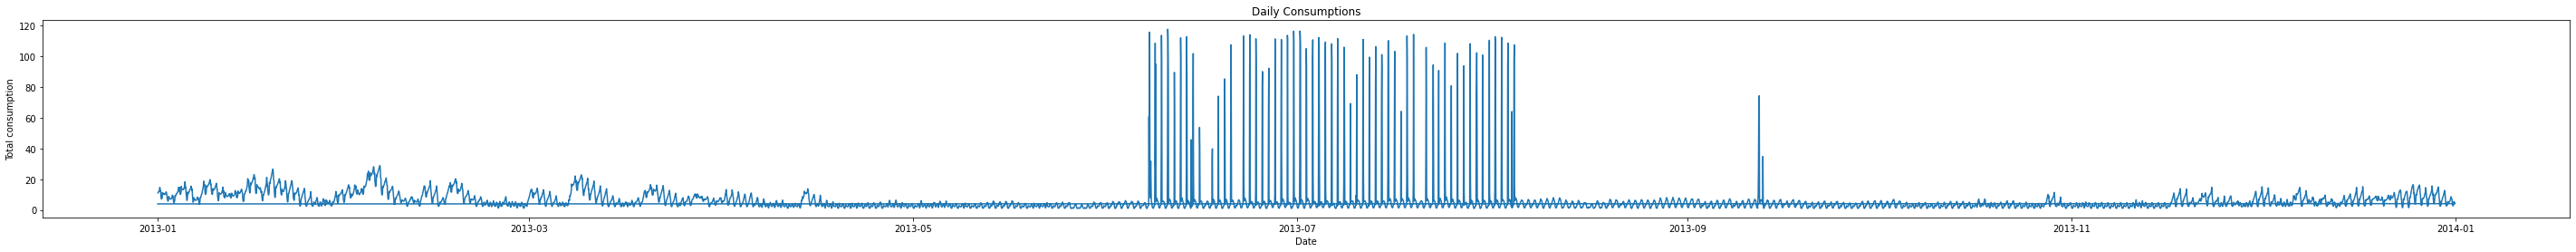

In [476]:
fig,ax = plt.subplots(1,1,figsize=(50,4))

ax.plot(df.Time, 
        df['Total Comsumption'])

ax.set_xlabel('Date')
ax.set_ylabel('Total consumption')

ax.set_title('Daily Consumptions');

##### The daily line plot shows that June - August and some week in September have a period of extremely large consumptions.

### Extreme values 1 - Hot seasons

In [336]:
jun1 = datetime(2013, 6, 1, 0)
jun30 = datetime(2013, 6, 30, 23)
jul1 = datetime(2013, 7, 1, 0)
jul31 = datetime(2013, 7, 31, 23)
aug1 = datetime(2013, 8, 1, 0)
aug31 = datetime(2013, 8, 31, 23)

df_jun = df[(df.Time >= jun1) & (df.Time <= jun30)]     # data of June
df_jul = df[(df.Time >= jul1) & (df.Time <= jul31)]     # data of July
df_aug = df[(df.Time >= aug1) & (df.Time <= aug31)]     # data of August

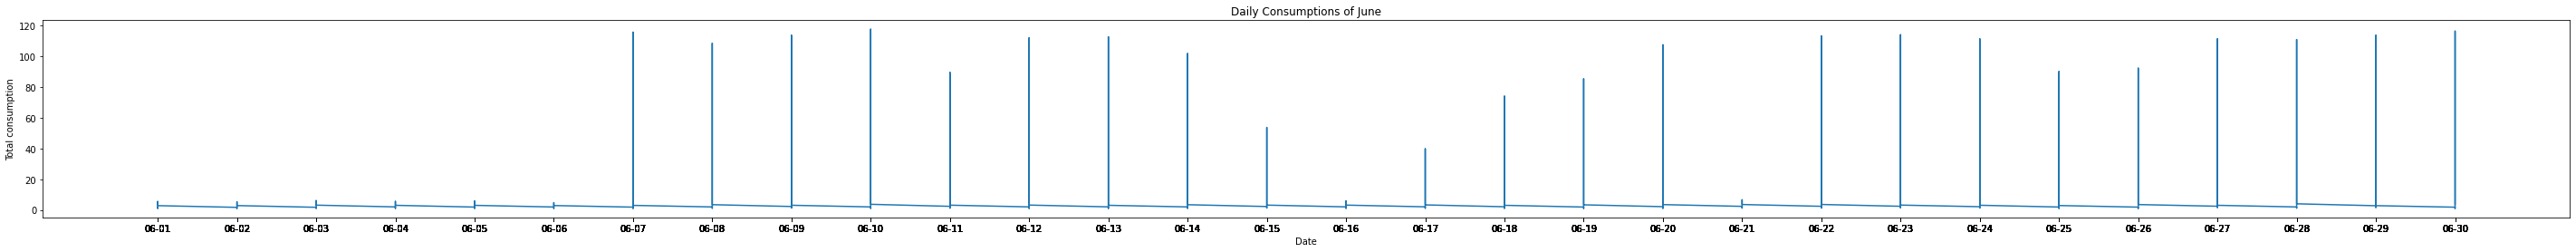

In [335]:
fig,ax = plt.subplots(1,1,figsize=(50,4))

ax.plot(df_jun.Date, 
        df_jun['Total Comsumption'])

ax.set_xlabel('Date')
ax.set_ylabel('Total consumption')

ax.set_xticks(df_jun.Date)     # show all the x-label

ax.set_title('Daily Consumptions of June');

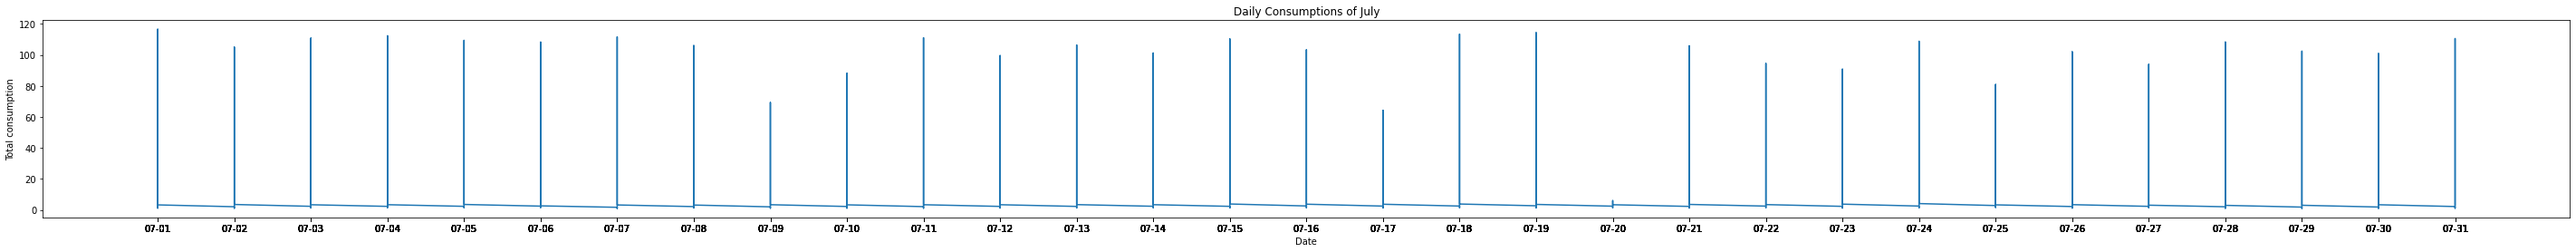

In [337]:
fig,ax = plt.subplots(1,1,figsize=(50,4))

ax.plot(df_jul.Date, 
        df_jul['Total Comsumption'])

ax.set_xlabel('Date')
ax.set_ylabel('Total consumption')

ax.set_xticks(df_jul.Date)

ax.set_title('Daily Consumptions of July');

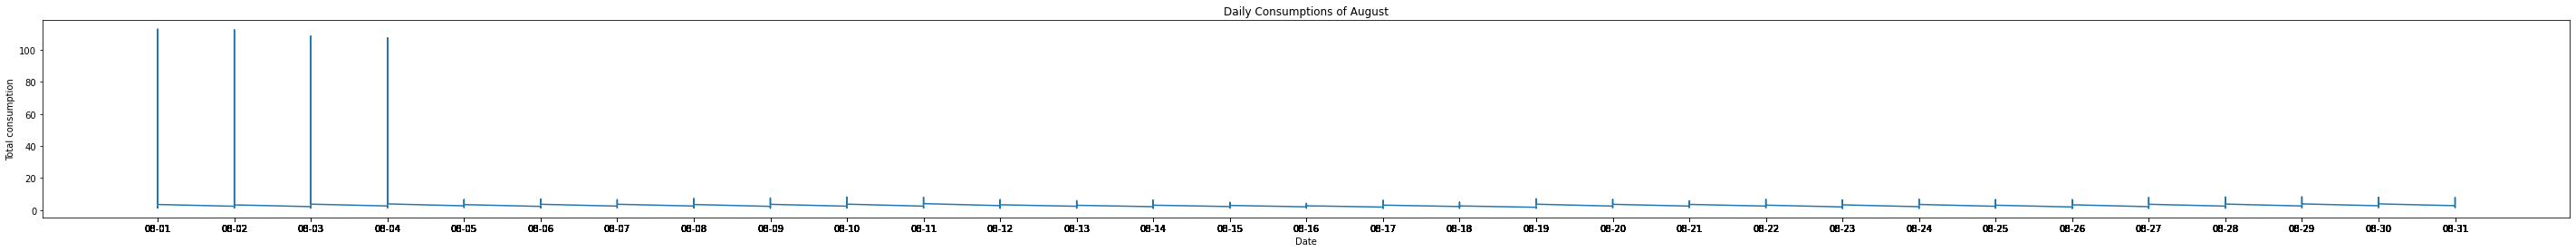

In [338]:
fig,ax = plt.subplots(1,1,figsize=(50,4))

ax.plot(df_aug.Date, 
        df_aug['Total Comsumption'])

ax.set_xlabel('Date')
ax.set_ylabel('Total consumption')

ax.set_xticks(df_aug.Date)

ax.set_title('Daily Consumptions of August');

##### These 3 plots shows that since Jun 7th to Aug 4th, the total consumption is extremely high. So I can assume that it is due to the consumption of air conditioning in the hot seasons and days.

### Extreme Value 2 - Sep 12th

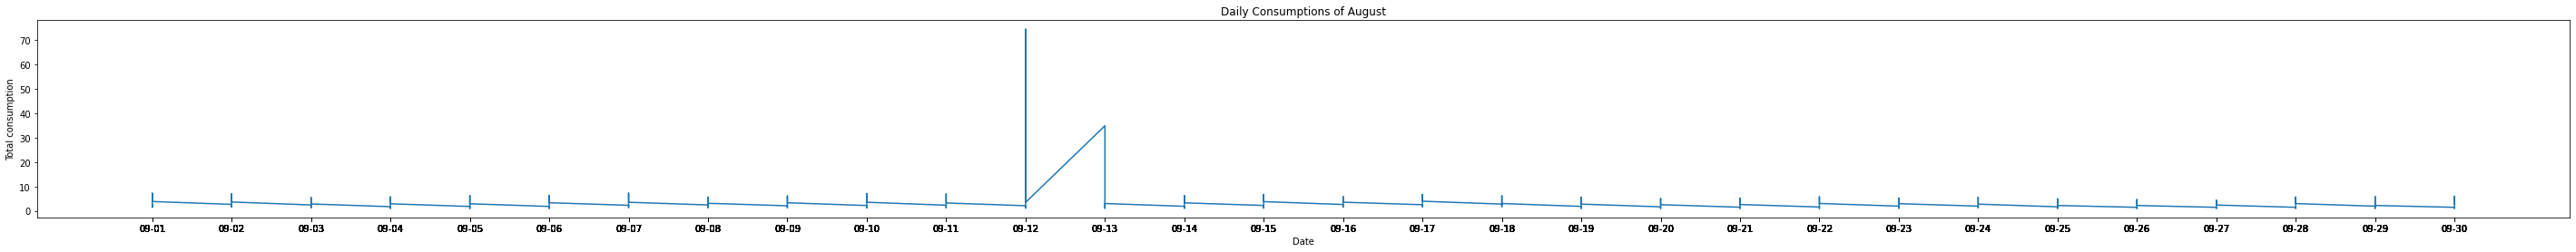

In [412]:
sep1 = datetime(2013, 9, 1, 0)
sep30 = datetime(2013, 9, 30, 23)

df_sep = df[(df.Time >= sep1) & (df.Time <= sep30)]     # data of September

fig,ax = plt.subplots(1,1,figsize=(50,4))

ax.plot(df_sep.Date, 
        df_sep['Total Comsumption'])

ax.set_xlabel('Date')
ax.set_ylabel('Total consumption')

ax.set_xticks(df_sep.Date)

ax.set_title('Daily Consumptions of August');

##### From the plot, we can tell the one day with extreme value is Sep 12th.

In [413]:
df[(df.Time >= datetime(2013, 9, 12, 0)) & (df.Time <= datetime(2013, 9, 12, 23))]

,Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),W_min_sum,Total Comsumption,Date,Hour,Weekday
6095,2013-09-12 00:00:00,0.919077,0.021526,0.0,0.0,0.156209,0.050467,0.206676,0.050467,0.152065,0.032759,0.097916,0.312524,0.100493,0.000000,2.100179,09-12,00,3
6096,2013-09-12 01:00:00,0.700912,0.019820,0.0,0.0,0.102208,0.033023,0.135231,0.033023,0.091239,0.019655,0.083492,0.287752,0.066898,0.000000,1.573254,09-12,01,3
6097,2013-09-12 02:00:00,0.591902,0.019590,0.0,0.0,0.065683,0.021222,0.086905,0.021222,0.060826,0.013104,0.071685,0.284416,0.058323,0.000000,1.294879,09-12,02,3
6098,2013-09-12 03:00:00,0.550088,0.019315,0.0,0.0,0.040856,0.013200,0.054057,0.013200,0.060826,0.013104,0.064195,0.280412,0.060850,0.000000,1.170103,09-12,03,3
6099,2013-09-12 04:00:00,0.551201,0.018585,0.0,0.0,0.022889,0.007395,0.030284,0.007395,0.060826,0.013104,0.073536,0.269820,0.086988,0.003673,1.145696,09-12,04,3
6100,2013-09-12 05:00:00,0.709405,0.020739,0.0,0.0,0.017383,0.005655,0.023038,0.005655,0.065171,0.014039,0.085363,0.301097,0.204052,4.411094,5.862693,09-12,05,3
6101,2013-09-12 06:00:00,1.131065,0.023962,0.0,0.0,0.046310,0.015064,0.061374,0.015064,0.121652,0.026207,0.135605,0.347888,0.421695,7.480281,9.826167,09-12,06,3
6102,2013-09-12 07:00:00,1.473819,0.025462,0.0,0.0,0.079918,0.025653,0.105570,0.025653,0.230269,0.049606,0.208909,0.369657,0.478162,23.293731,26.366410,09-12,07,3
6103,2013-09-12 08:00:00,1.449928,0.021526,0.0,0.0,0.121512,0.037449,0.158961,0.037449,0.191167,0.041182,0.269481,0.312524,0.459968,53.714018,56.815167,09-12,08,3
6104,2013-09-12 09:00:00,1.385936,0.018321,0.0,0.0,0.189882,0.056829,0.246711,0.056829,0.095584,0.020591,0.330413,0.265983,0.410010,65.196194,68.273284,09-12,09,3


##### The peak is during 7am to 10am and also due to the consumption of the newly added appliance.

### Hourly pattern

#### Get the mean value of each hour and observe the pattern.

In [408]:
def merge_hourly(df):
    """
    Returns the average consumptions of each hour of the day.
    """
    hour = np.arange(0, 24, 1)
    consumption = list(0 for i in range(0, 24))
    
    new_df_24 = pd.DataFrame({'hour': hour, 
                              'consumption': consumption}).set_index('hour')
    
    for i in range(0, len(df)):
        new_df_24.iloc[int(df.Hour[i])] += df['Total Comsumption'].iloc[i]
    
    new_df_24 /= (len(df) / 24)
    
    return new_df_24

#### In the summer season (with extreme values):

In [402]:
jun6 = datetime(2013, 6, 7, 0)
aug4 = datetime(2013, 8, 4, 23)

df_ac = df[(df.Time >= jun6) & (df.Time <= aug4)].reset_index()

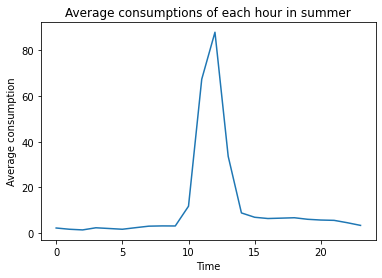

In [409]:
df_24_ac = merge_hourly(df_ac)

fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(df_24_ac)

ax.set_xlabel('Time')
ax.set_ylabel('Average consumption')

ax.set_title('Average consumptions of each hour in summer');

##### The plot shows, the peak is around 11am of the day and the extreme value is in the summer, so I can make the assumption that it is due to the consumption of air conditioning needed in the hot seasons.          

In [406]:
df[(df.Time >= datetime(2013, 7, 18, 0)) & (df.Time <= datetime(2013, 7, 18, 23))]

,Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),W_min_sum,Total Comsumption,Date,Hour,Weekday
4751,2013-07-18 00:00:00,1.043944,0.021430,0.0,0.0,0.255572,0.080129,0.335701,0.080129,0.154019,0.033180,0.097981,0.311118,0.095301,0.000000,2.508504,07-18,00,3
4752,2013-07-18 01:00:00,0.818474,0.019731,0.0,0.0,0.194148,0.060409,0.254557,0.060409,0.093053,0.020046,0.083557,0.286457,0.064159,0.000000,1.955000,07-18,01,3
4753,2013-07-18 02:00:00,0.688293,0.019502,0.0,0.0,0.141856,0.044476,0.186332,0.044476,0.060966,0.013134,0.071717,0.283136,0.056364,0.000000,1.610252,07-18,02,3
4754,2013-07-18 03:00:00,0.630887,0.019228,0.0,0.0,0.104933,0.033187,0.138120,0.033187,0.060966,0.013134,0.064227,0.279151,0.058645,0.000000,1.435664,07-18,03,3
4755,2013-07-18 04:00:00,0.627647,0.018501,0.0,0.0,0.085270,0.026968,0.112238,0.026968,0.060966,0.013134,0.073601,0.268606,0.082459,0.000000,1.396358,07-18,04,3
4756,2013-07-18 05:00:00,0.791613,0.020646,0.0,0.0,0.092956,0.029145,0.122101,0.029145,0.064175,0.013825,0.085460,0.299742,0.189666,0.000000,1.738473,07-18,05,3
4757,2013-07-18 06:00:00,1.142296,0.023854,0.0,0.0,0.110765,0.034729,0.145494,0.034729,0.089845,0.019355,0.135832,0.346323,0.388804,0.000000,2.472026,07-18,06,3
4758,2013-07-18 07:00:00,1.440479,0.025347,0.0,0.0,0.162355,0.050044,0.212399,0.050044,0.147602,0.031797,0.209299,0.367994,0.439745,0.000000,3.137104,07-18,07,3
4759,2013-07-18 08:00:00,1.440527,0.021430,0.0,0.0,0.218402,0.065383,0.283785,0.065383,0.112306,0.024194,0.269903,0.311118,0.422579,0.000000,3.235007,07-18,08,3
4760,2013-07-18 09:00:00,1.506454,0.018238,0.0,0.0,0.344695,0.098943,0.443638,0.098943,0.060966,0.013134,0.330855,0.264786,0.376431,0.000000,3.557084,07-18,09,3


##### The peak value is due to the newly added appliance.

#### In other seasons:

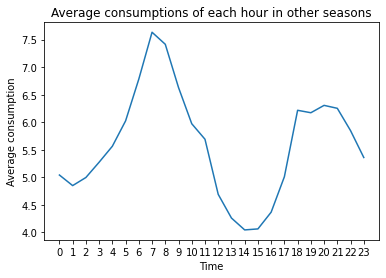

In [410]:
df_not_ac = df[(df.Time < jun6) | (df.Time > aug4)].reset_index()

df_24_not_ac = merge_hourly(df_not_ac)

fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(df_24_not_ac)

ax.set_xlabel('Time')
ax.set_ylabel('Average consumption')

ax.set_xticks(df_24_not_ac.index)

ax.set_title('Average consumptions of each hour in other seasons');

##### The plot shows peak values are in the morning(6am - 9am) and in the early night(18pm-22pm).

### Weekly Pattern

In [416]:
def merge_weekly(df):
    """
    Returns the average consumptions of each weekday.
    """
    weekday = np.arange(0, 7, 1)
    consumption = list(0 for i in range(0, 7))
    
    new_df_7 = pd.DataFrame({'weekday': weekday, 
                              'consumption': consumption}).set_index('weekday')
    
    for i in range(0, len(df)):
        new_df_7.iloc[int(df.Weekday[i])] += df['Total Comsumption'].iloc[i]
    
    new_df_7 /= (len(df) / 24 / 7)
    
    return new_df_7

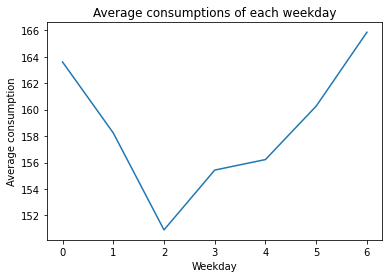

In [423]:
df_7 = merge_weekly(df)

fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(df_7)

ax.set_xlabel('Weekday')
ax.set_ylabel('Average consumption')

ax.set_title('Average consumptions of each weekday');

##### The plot shows, average consumption is getting lower in the weekdays(Mon-Fri), and reaches the peak in weekends.

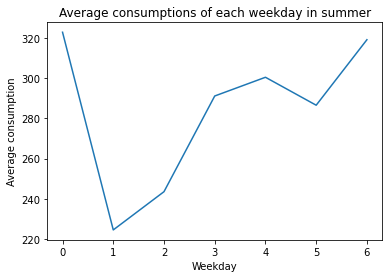

In [419]:
df_7_ac = merge_weekly(df_ac)

fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(df_7_ac)

ax.set_xlabel('Weekday')
ax.set_ylabel('Average consumption')

ax.set_title('Average consumptions of each weekday in summer');

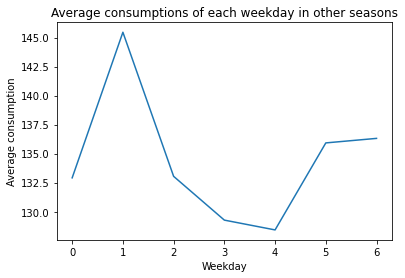

In [418]:
df_7_not_ac = merge_weekly(df_not_ac)

fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(df_7_not_ac)

ax.set_xlabel('Weekday')
ax.set_ylabel('Average consumption')

ax.set_title('Average consumptions of each weekday in other seasons');